# Proyecto segundo Parcial

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule_integration(func, a, b, N):
    """Regla del trapecio para integración numérica."""
    x = np.linspace(a, b, N)
    y = func(x)
    h = (b - a) / N
    integral = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    return integral




In [16]:
def fourier_transform(signal, freq, N):
    """Transformada de Fourier mediante integración numérica."""
    def integrand(t, signal, freq):
        return signal(t) * np.exp(-2j *np.pi* freq * t)

    integral = trapezoidal_rule_integration(lambda t: integrand(t, signal, freq), 0, 1, N)
    return integral

# Señal de ejemplo
t = np.arange(0, 1, 1e-8)  # Vector de tiempo de 0 a 1 segundo
f1 = 2000  # Frecuencia de la señal
A1 = 1  # Amplitud de la primera frecuencia

signal = lambda t: A1 * np.sin(2 * np.pi * f1 * t)

# Frecuencias para la transformada
num_points = 1000
frequencies = np.linspace(Fi, Ff, num_points)
Fi = 1000
Ff = 5000
z = np.zeros(num_points) 
# Calcular la Transformada de Fourier
for i in range (0,num_points):
    FR = Fi + i*((Ff-Fi)/num_points)
    z[i] = np.abs(fourier_transform(signal, FR, num_points))


# Graficar la transformada de Fourier
plt.plot(frequencies, z)
plt.title('Transformada de Fourier (Integración Numérica)')
plt.xlabel('w (Hz)')
plt.ylabel('F(w)')
plt.xlim(Fi, Ff)
plt.show()

NameError: name 'Fi' is not defined

In [ ]:
S = signal(t)
fq = np.fft.fftfreq(S.shape[-1])
val = np.fft.fft(S)

plt.plot(fq,val.real)

In [54]:
fq


array([ 0.e+00,  2.e-06,  4.e-06, ..., -6.e-06, -4.e-06, -2.e-06])

In [24]:
signal(t)

array([ 0.00000000e+00,  1.00000000e+00, -3.21624530e-16, ...,
        1.00000000e+00,  5.73121084e-13, -1.00000000e+00])

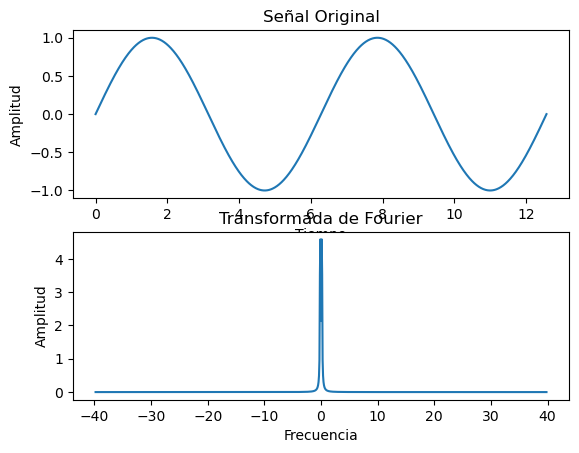

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de la señal
def signal(t):
    return np.sin(t)  # Señal de ejemplo: una onda senoidal

# Parámetros de la señal y de la transformada
tiempo_inicio = 0
tiempo_fin = 4 * np.pi
numero_puntos = 1000
frecuencia_muestreo = numero_puntos / (tiempo_fin - tiempo_inicio)

tiempos = np.linspace(tiempo_inicio, tiempo_fin, numero_puntos)
senal = signal(tiempos)

# Calcular la Transformada de Fourier mediante integración numérica
def fourier_transform(f, t, omega):
    return np.sum(f(t) * np.exp(-1j * omega * t)) * (t[1] - t[0])

frecuencias = np.linspace(-frecuencia_muestreo / 2, frecuencia_muestreo / 2, numero_puntos)
transformada = np.array([fourier_transform(signal, tiempos, omega) for omega in 2 * np.pi * frecuencias])

# Graficar la señal original y su Transformada de Fourier
plt.subplot(2, 1, 1)
plt.plot(tiempos, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.show()


Frecuencias detectadas: [ 714.95495495  794.83483483 2384.44444444 2464.32432432 2544.2042042
 4053.93393393 4213.69369369 5803.3033033  5883.18318318 7472.79279279
 7552.67267267]


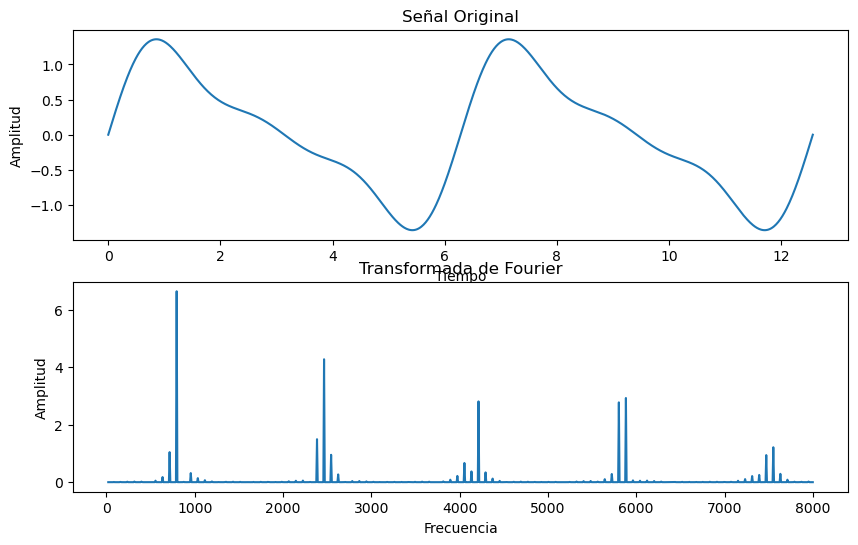

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de la señal
def signal(t):
    return np.sin(t) + 0.5 * np.sin(2 * t) + 0.2 * np.sin(3 * t)  # Señal de ejemplo: suma de tres ondas senoidales

# Parámetros de la señal y de la transformada
tiempo_inicio = 0
tiempo_fin = 4 * np.pi
numero_puntos = 1000

tiempos = np.linspace(tiempo_inicio, tiempo_fin, numero_puntos)
senal = signal(tiempos)

# Calcular la Transformada de Fourier mediante el método del trapecio
def fourier_transform(f, t, omega):
    integrand = f(t) * np.exp(-1j * omega * t)
    dt = t[1] - t[0]
    integral = np.trapz(integrand, dx=dt)
    return integral

frecuencias = np.linspace(20, 8000, numero_puntos)  # Rango de frecuencias a considerar
transformada = np.array([fourier_transform(signal, tiempos, omega) for omega in 2 * np.pi * frecuencias])


# Encontrar los picos significativos
umbral_picos = 0.1 * np.max(np.abs(transformada))  # Definir un umbral para los picos
picos = np.where(np.abs(transformada) > umbral_picos)[0]
frecuencias_detectadas = frecuencias[picos]

# Mostrar las frecuencias detectadas
print("Frecuencias detectadas:", frecuencias_detectadas)

# Graficar la señal original y su Transformada de Fourier
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempos, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.show()


Acorde identificado: []


In [13]:
def generar_notas_piano():
    notas_piano = {}
    
    # Frecuencia de la nota La correspondiente a la octava 0 (A0)
    la_base = 16.3516
    
    # Nombres de las notas y sus frecuencias para cada octava (A0 a C8)
    nombre_notas = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    for octava in range(0, 9):  # Desde la octava 0 (A0) hasta la octava 8 (C8)
        for i, nota in enumerate(nombre_notas):
            frecuencia = la_base * (2 ** (octava + (i / 12)))
            notas_piano[f"{nota}{octava}"] = frecuencia
    
    return notas_piano

# Ejemplo de uso:
notas_piano = generar_notas_piano()
print(notas_piano)


{'C0': 16.3516, 'C#0': 17.323916733725454, 'D0': 18.354050429135544, 'D#0': 19.445439061678496, 'E0': 20.60172503946101, 'F0': 21.826767359446734, 'F#0': 23.124654486499903, 'G0': 24.49971799825675, 'G#0': 25.956547041363212, 'A0': 27.50000364732528, 'A#0': 29.135238959087147, 'B0': 30.867710422491964, 'C1': 32.7032, 'C#1': 34.64783346745091, 'D1': 36.70810085827109, 'D#1': 38.89087812335699, 'E1': 41.20345007892202, 'F1': 43.65353471889347, 'F#1': 46.249308972999806, 'G1': 48.999435996513505, 'G#1': 51.913094082726424, 'A1': 55.00000729465056, 'A#1': 58.2704779181743, 'B1': 61.73542084498391, 'C2': 65.4064, 'C#2': 69.29566693490182, 'D2': 73.41620171654216, 'D#2': 77.78175624671398, 'E2': 82.40690015784403, 'F2': 87.30706943778692, 'F#2': 92.49861794599961, 'G2': 97.99887199302701, 'G#2': 103.82618816545285, 'A2': 110.00001458930112, 'A#2': 116.5409558363486, 'B2': 123.47084168996783, 'C3': 130.8128, 'C#3': 138.59133386980363, 'D3': 146.83240343308432, 'D#3': 155.56351249342796, 'E3':

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de la señal
def signal(t):
    return np.sin(t) + 0.5 * np.sin(2 * t) + 0.2 * np.sin(3 * t)  # Señal de ejemplo: suma de tres ondas senoidales

# Parámetros de la señal y de la transformada
tiempo_inicio = 0
tiempo_fin = 4 * np.pi
numero_puntos = 1000

tiempos = np.linspace(tiempo_inicio, tiempo_fin, numero_puntos)
senal = signal(tiempos)

# Calcular la Transformada de Fourier mediante la regla del trapecio
def fourier_transform(f, t, omega):
    integrand = f(t) * np.exp(-1j * omega * t)
    return trapezoidal_rule_integration(integrand, t[0], t[-1], len(t))

frecuencias = np.linspace(-5, 5, numero_puntos)  # Rango de frecuencias a considerar
transformada = np.array([fourier_transform(signal, tiempos, omega) for omega in 2 * np.pi * frecuencias])

# Graficar la señal original y su Transformada de Fourier
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempos, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.show()

TypeError: 'numpy.ndarray' object is not callable

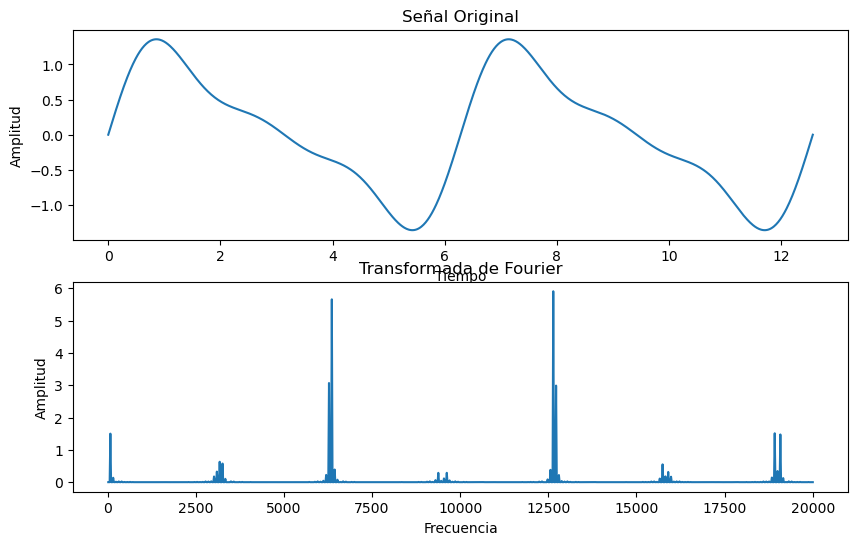

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de la señal
def signal(t):
    return np.sin(t) + 0.5 * np.sin(2 * t) + 0.2 * np.sin(3 * t)  # Señal de ejemplo: suma de tres ondas senoidales

# Función de integración numérica utilizando la regla del trapecio
def trapezoidal_rule_integration(integrand, a, b, N):
    """Regla del trapecio para integración numérica."""
    x = np.linspace(a, b, N)
    h = (b - a) / N
    integral = h * (np.sum(integrand) - 0.5 * (integrand[0] + integrand[-1]))
    return integral

# Parámetros de la señal y de la transformada
tiempo_inicio = 0
tiempo_fin = 4 * np.pi
numero_puntos = 1000

tiempos = np.linspace(tiempo_inicio, tiempo_fin, numero_puntos)
senal = signal(tiempos)

# Calcular la Transformada de Fourier mediante la regla del trapecio
def fourier_transform(f, t, omega):
    integrand = f(t) * np.exp(-1j * omega * t)
    return trapezoidal_rule_integration(integrand, t[0], t[-1], len(t))

frecuencias = np.linspace(20, 20000, numero_puntos)  # Rango de frecuencias a considerar
transformada = np.array([fourier_transform(signal, tiempos, omega) for omega in 2 * np.pi * frecuencias])

# Graficar la señal original y su Transformada de Fourier
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempos, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.show()


In [ ]:
def identificar_acorde(frecuencias_detectadas):
    def generar_notas_piano():
    notas_piano = {}
    
    # Frecuencia de la nota La correspondiente a la octava 0 (A0)
    la_base = 16.3516
    
    # Nombres de las notas y sus frecuencias para cada octava (A0 a C8)
    nombre_notas = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    for octava in range(0, 9):  # Desde la octava 0 (A0) hasta la octava 8 (C8)
        for i, nota in enumerate(nombre_notas):
            frecuencia = la_base * (2 ** (octava + (i / 12)))
            notas_piano[f"{nota}{octava}"] = frecuencia
    
    return notas_piano

# Ejemplo de uso:
    notas = generar_notas_piano()
    acorde = []
    for nota, frecuencia in notas.items():
        if any(abs((frecuencia - f)/frecuencia)*100 < 5 for f in frecuencias_detectadas):  # Consideramos una tolerancia de 5 Hz
            acorde.append(nota)
    
    return acorde

# Ejemplo de uso:
acorde_identificado = identificar_acorde(frecuencias_detectadas)
print("Acorde identificado:", acorde_identificado)
